In [1]:
import pandas as pd
import boto3
# import S3FS
import os.path
from pathlib import Path
from pyspark.sql import SparkSession
from boto3.session import Session
import sys
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
from helper_func import *
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("emscad_v1.csv")

In [3]:
data.drop("in_balanced_dataset", inplace = True, axis = 1)

In [4]:
data["fraudulent"] = data["fraudulent"].replace(["f" , "t"], ["Not Fraud", "Fraud"])

In [5]:
fraud_prop = data.groupby("fraudulent").size().reset_index(name = "counts")
x = np.array(fraud_prop.iloc[:,0])
y = np.array(fraud_prop.iloc[:,1])
total = y.sum()

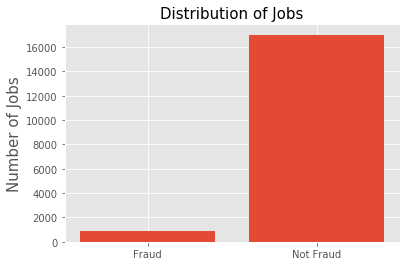

In [6]:
fig = plt.figure()
plt.bar(x, y) 
plt.ylabel("Number of Jobs", fontsize=15) 
plt.title("Distribution of Jobs", fontsize=15)
fig.savefig('images/fraud.png', bbox_inches='tight');

<Figure size 432x288 with 0 Axes>

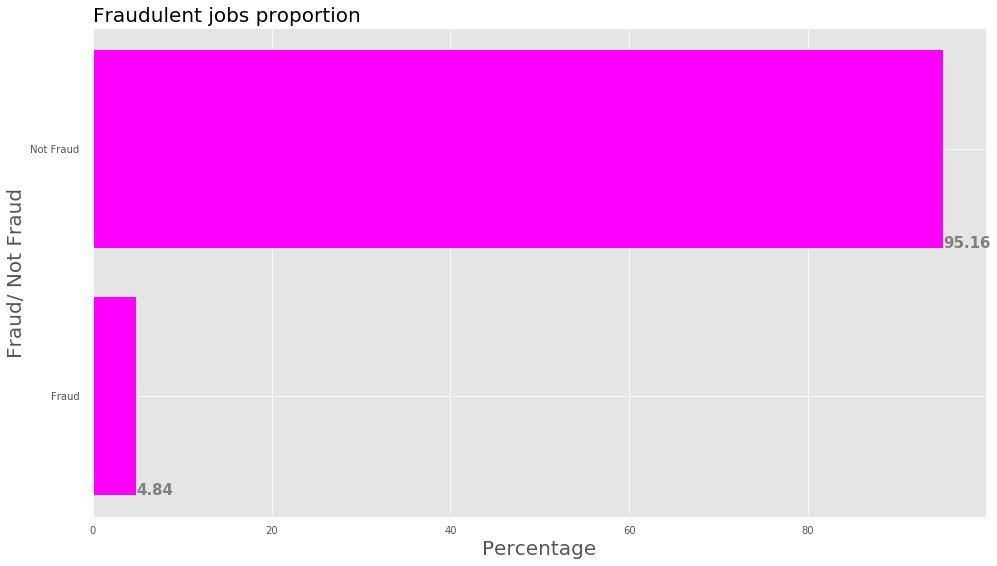

In [7]:
# fraud distribution percentages
fig = plt.figure()
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y*100/total, color="magenta")
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches: 
    plt.text(i.get_width(), i.get_y(),  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey')
    
ax.set_title("Fraudulent jobs proportion", 
             loc ='left', fontsize =20) 
ax.set_ylabel("Fraud/ Not Fraud", fontsize =20)
ax.set_xlabel("Percentage", fontsize =20)
fig.savefig('images/fraud_perc.png', bbox_inches='tight')

In [8]:
data["fraudulent"] = data["fraudulent"].replace(["Not Fraud", "Fraud"], [0,1])

binary_cols = ["telecommuting", "has_company_logo","has_questions"]

for col in binary_cols:
    binarize(data,col)



In [9]:
fill_nulls(data)

<Figure size 432x288 with 0 Axes>

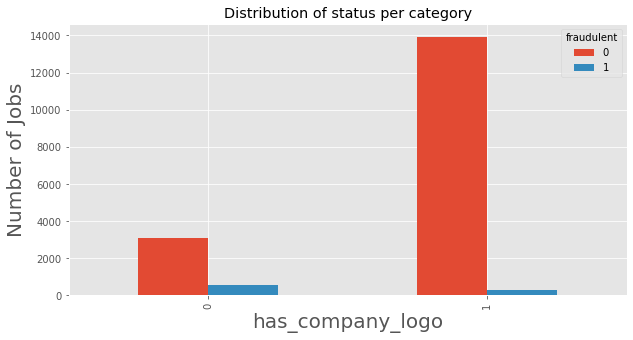

<Figure size 432x288 with 0 Axes>

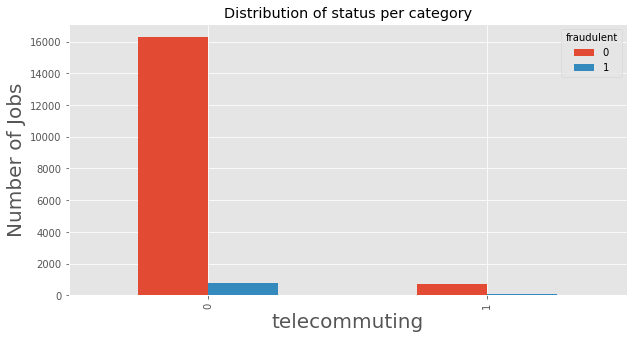

<Figure size 432x288 with 0 Axes>

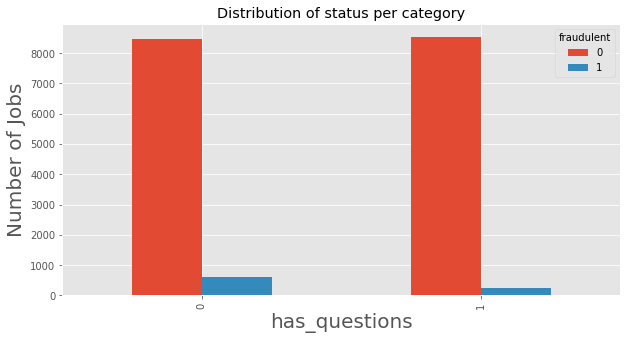

<Figure size 432x288 with 0 Axes>

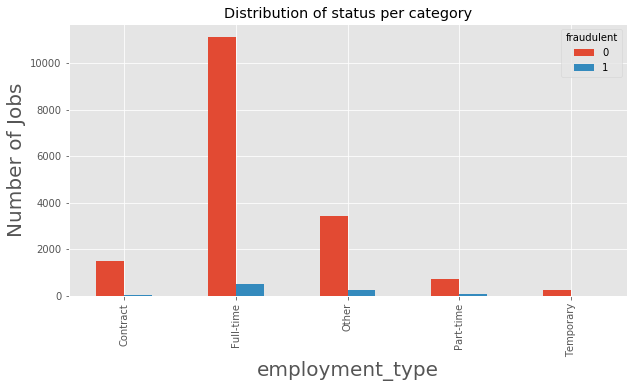

In [10]:
cols = ["has_company_logo","telecommuting", "has_questions", "employment_type" ]

for col in cols:
    plot_bar(data,col)

In [11]:
text_cols = ["title", "company_profile", "description", "requirements", "benefits"]

for col in text_cols:
    clean_cols(data,col)


In [12]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,market intern,"US, NY, New York",Marketing,Not Specified,were food52 weve creat groundbreak awardwin co...,food52 fastgrow jame beard awardwin onlin food...,experi content manag system major plus ani blo...,,0,1,0,Other,Internship,Unspecified,Not Specified,Marketing,0
1,custom servic cloud video product,"NZ, , Auckland",Success,Not Specified,90 second world cloud video product servic 90 ...,organis focus vibrant awesom passion custom se...,expect you key respons communic client 90 seco...,get u part 90 second team gain experi work pro...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0
2,commiss machineri assist cma,"US, IA, Wever",Not Specified,Not Specified,valor servic provid workforc solut meet need c...,client locat houston activ seek experienc comm...,implement precommiss commiss procedur rotari e...,,0,1,0,Other,NotSpecified,Unspecified,Not Specified,Other,0
3,account execut washington dc,"US, DC, Washington",Sales,Not Specified,passion improv qualiti life geographi heart ev...,compani esri environment system research insti...,educ bachelor master gi busi administr relat f...,cultur anyth corporatew collabor creativ envir...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,bill review manag,"US, FL, Fort Worth",Not Specified,Not Specified,spotsourc solut llc global human capit manag c...,job titl item review manag locat fort worth tx...,qualif rn licens state texa diploma bachelor s...,full benefit offer,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<Figure size 432x288 with 0 Axes>

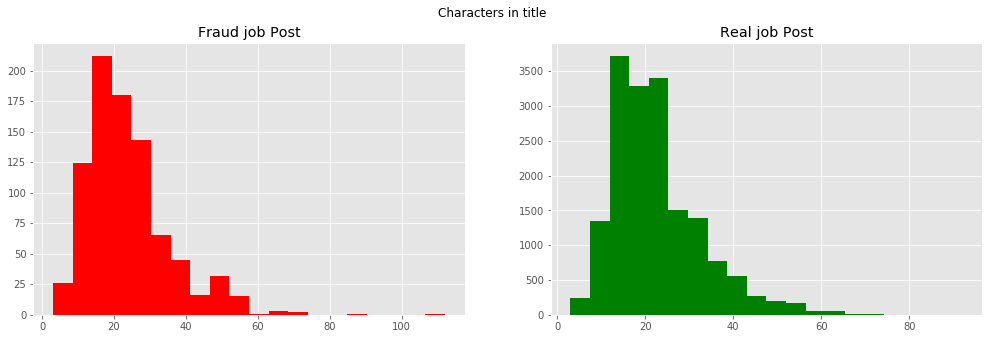

<Figure size 432x288 with 0 Axes>

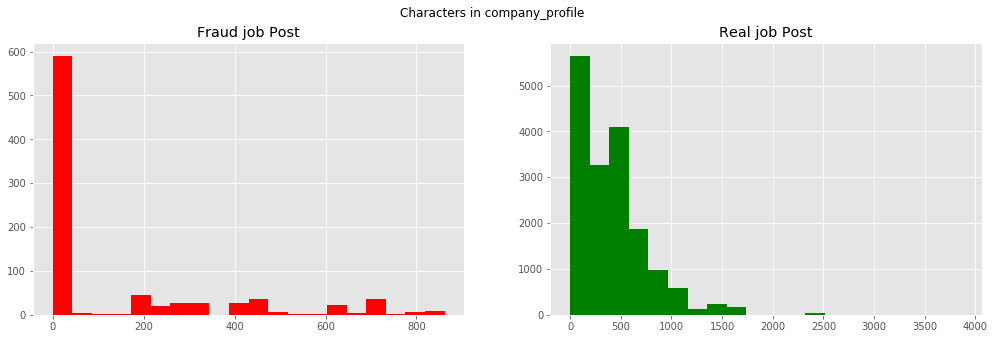

<Figure size 432x288 with 0 Axes>

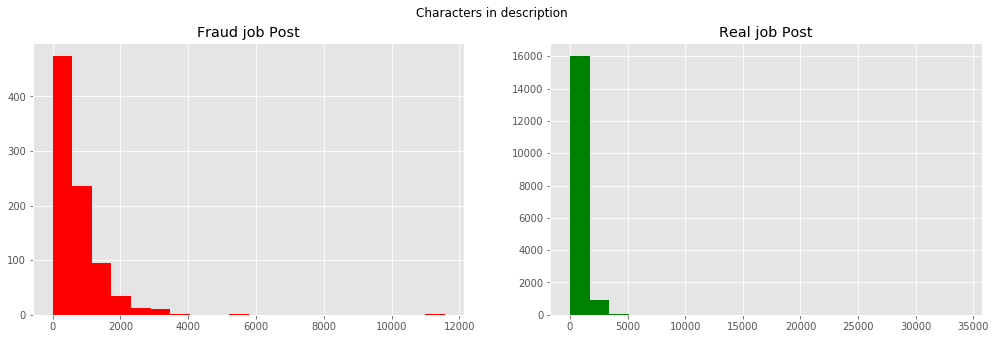

<Figure size 432x288 with 0 Axes>

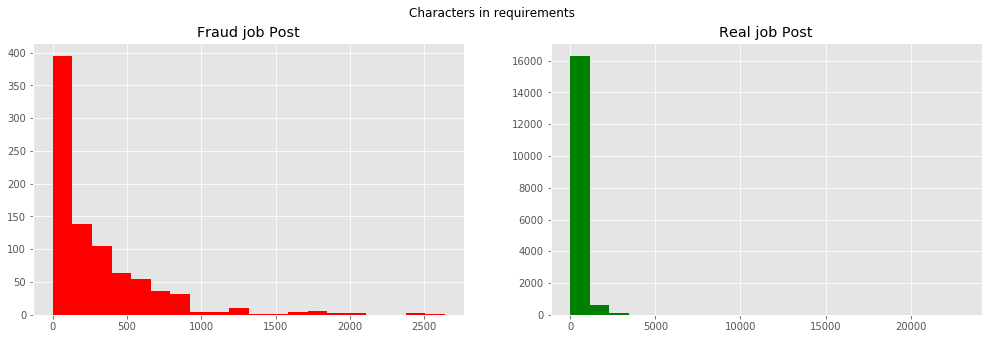

<Figure size 432x288 with 0 Axes>

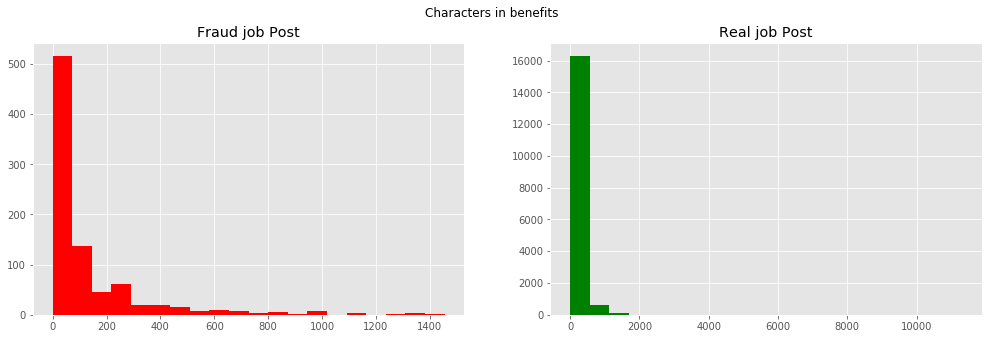

In [13]:
for col in text_cols:
    plot_text(data, col)

<Figure size 432x288 with 0 Axes>

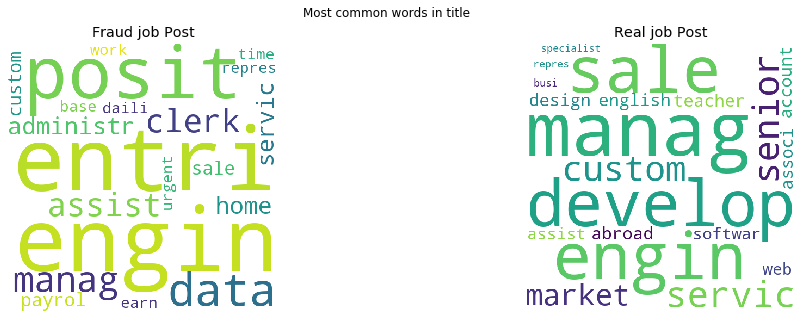

<Figure size 432x288 with 0 Axes>

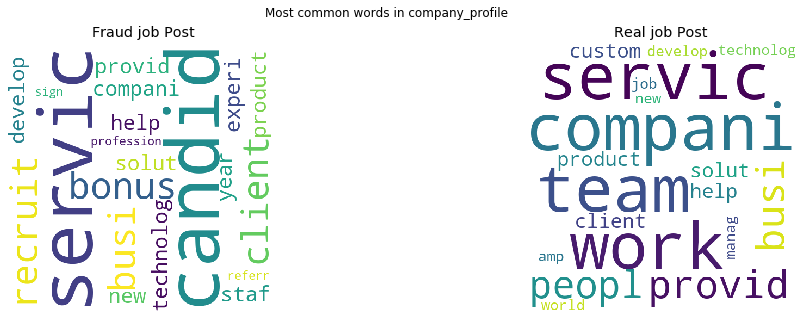

<Figure size 432x288 with 0 Axes>

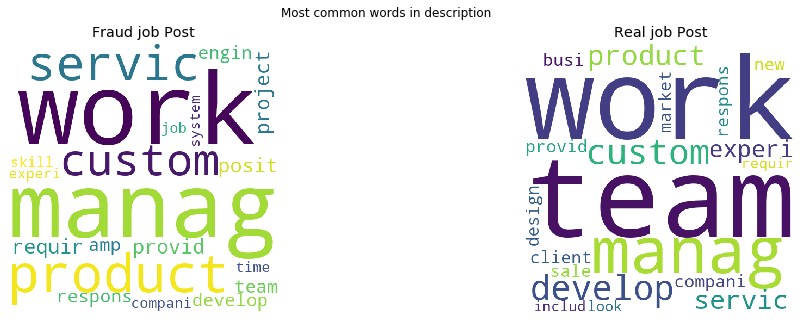

<Figure size 432x288 with 0 Axes>

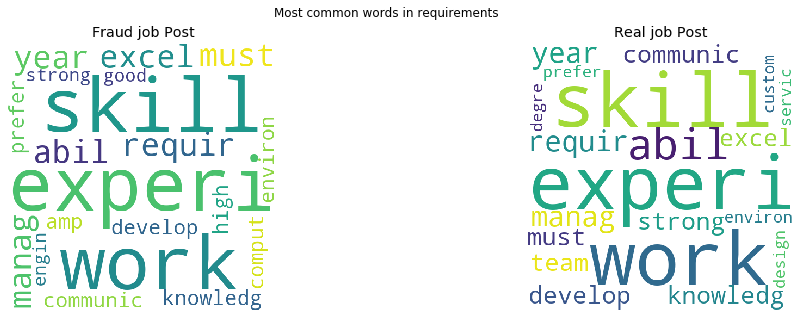

<Figure size 432x288 with 0 Axes>

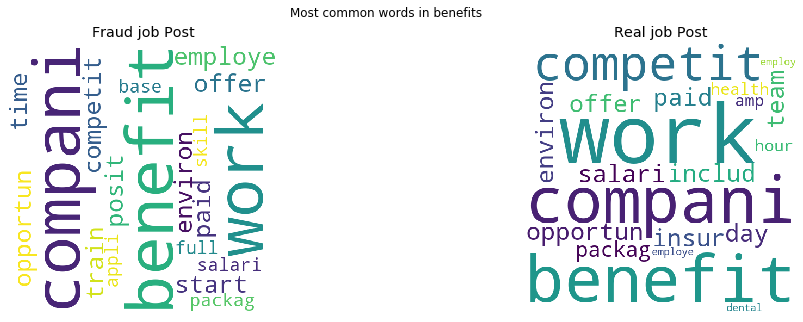

In [14]:
for col in text_cols:
    plot_wordcloud(data, col)

In [15]:
data["text"] = data["title"] + data["company_profile"] + data["description"] + data["requirements"] + data["benefits"]

In [16]:
data.text.head()

0    market internwere food52 weve creat groundbrea...
1    custom servic cloud video product90 second wor...
2    commiss machineri assist cmavalor servic provi...
3    account execut washington dcpassion improv qua...
4    bill review managspotsourc solut llc global hu...
Name: text, dtype: object

## Features Cleaning

In [17]:
df = data.copy()

In [18]:
clean_features(df)


In [19]:
df.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'text'],
      dtype='object')

## BASELINE MODEL

In [20]:
# Accuracy is useless in problems with unequal classes and has absolutely no predictive power

In [21]:
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [22]:
y_actual = np.array(df["fraudulent"])

In [23]:
y_pred0 = np.zeros(len(y_actual))
y_pred1 = np.ones(len(y_actual))
pred_y = np.random.choice([0,1],size=(len(y_actual),), p=[0.95,0.05])

In [24]:
cf = confusion_matrix(y_pred0, y_actual)


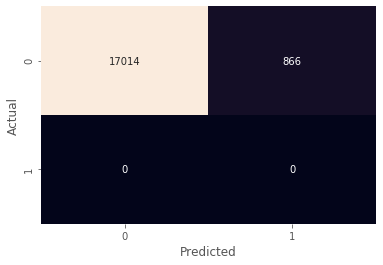

In [25]:
import seaborn as sns
fig = plt.figure()
ax = sns.heatmap(cf, annot=True, cbar=False, fmt='g')
ax.set(xlabel='Predicted', ylabel='Actual')
fig.savefig("images/conf_matrix", bbox_inches='tight')
plt.show()

### Baseline Results

In [26]:
#no frauds
generate_model_report(y_actual, y_pred0)

Accuracy: 0.952
Precision: 0.000
Recall: 0.000
F1 score: 0.000


/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#all frauds
generate_model_report(y_actual, y_pred1)

Accuracy: 0.048
Precision: 0.048
Recall: 1.000
F1 score: 0.092


In [28]:
# random prediction
generate_model_report(y_actual,pred_y)

Accuracy: 0.906
Precision: 0.053
Recall: 0.055
F1 score: 0.054


In [29]:
# All categories value except 'department', 'function'

fit_df = df[['location', 'industry', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'text', 'fraudulent']]


fit_df.head()

,location,industry,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,text,fraudulent
0,US,Not Specified,Not Specified,0,1,0,Other,Internship,Unspecified,market internwere food52 weve creat groundbrea...,0
1,NZ,Marketing and Advertising,Not Specified,0,1,0,Full-time,Not Applicable,Unspecified,custom servic cloud video product90 second wor...,0
2,US,Not Specified,Not Specified,0,1,0,Other,NotSpecified,Unspecified,commiss machineri assist cmavalor servic provi...,0
3,US,IT,Not Specified,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,account execut washington dcpassion improv qua...,0
4,US,Health Care,Not Specified,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,bill review managspotsourc solut llc global hu...,0


In [35]:
cat_df = fit_df[['location', 'industry', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']]

fit_df_dummy = pd.get_dummies(cat_df)



In [36]:
text_cat_df = pd.concat([fit_df_dummy, fit_df["text"]], axis = 1)

## To balance or not to balance

0    17014
1      866
Name: fraudulent, dtype: int64


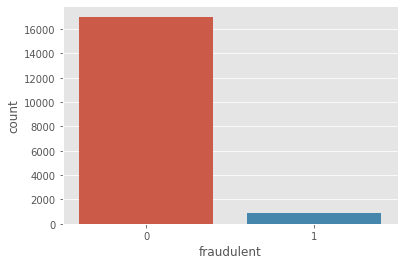

In [37]:
## Split first to avoid leakage and to handle imbalance


X = text_cat_df.drop("fraudulent", axis=1)
y = text_cat_df["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=1)


ax = sns.countplot(x = y, data = X)
print(y.value_counts())

# before balancing the data


## SMOTE

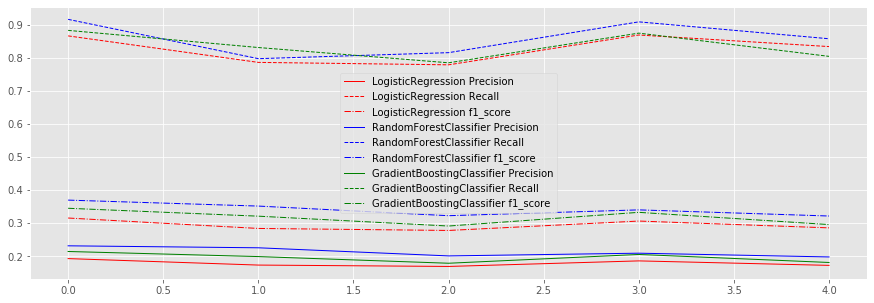

In [195]:
fig, ax = plt.subplots(figsize=(15, 5))
estimators = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
sampling_methods=["None", "undersampling", "oversampling", "smote"]
run_model(estimators, X.values, y, names=[m.__class__.__name__ for m in estimators], ax=ax, sampling_method='undersampling' )
ax.legend()

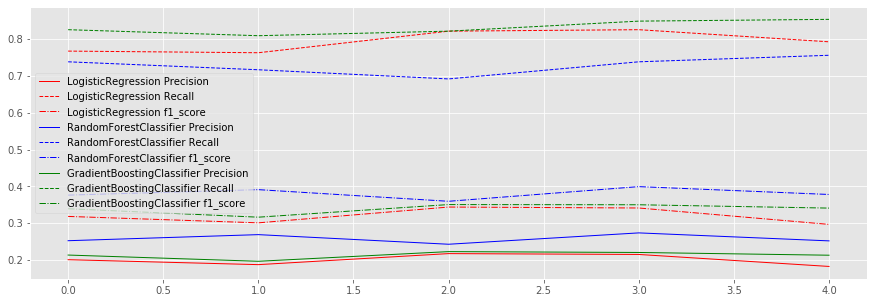

In [197]:
fig, ax = plt.subplots(figsize=(15, 5))
estimators = [LogisticRegression(max_iter=500), RandomForestClassifier(), GradientBoostingClassifier()]
sampling_methods=["None", "undersampling", "oversampling", "smote"]
run_model(estimators, X.values, y, names=[m.__class__.__name__ for m in estimators], ax=ax, sampling_method='oversampling' )
ax.legend()

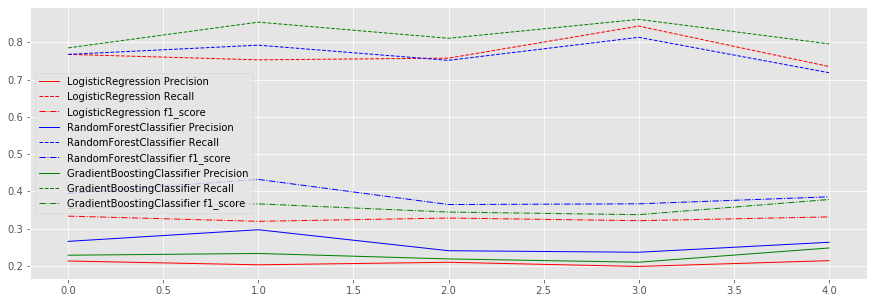

In [200]:
fig, ax = plt.subplots(figsize=(15, 5))
estimators = [LogisticRegression(max_iter=500), RandomForestClassifier(), GradientBoostingClassifier()]
sampling_methods=["None", "undersampling", "oversampling", "smote"]
run_model(estimators, X.values, y, names=[m.__class__.__name__ for m in estimators], ax=ax, sampling_method='smote' )
ax.legend()

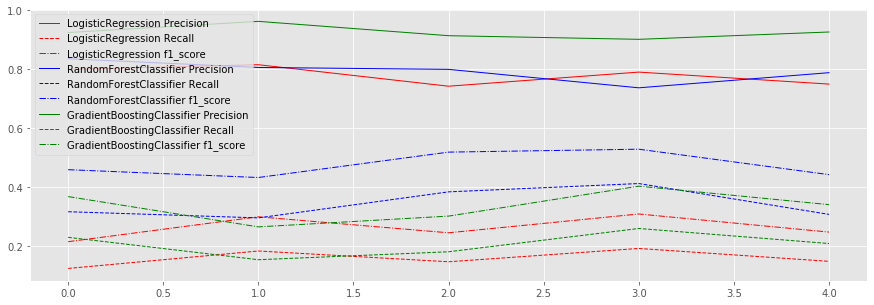

In [201]:
fig, ax = plt.subplots(figsize=(15, 5))
estimators = [LogisticRegression(max_iter=500), RandomForestClassifier(), GradientBoostingClassifier()]
sampling_methods=["None", "undersampling", "oversampling", "smote"]
run_model(estimators, X.values, y, names=[m.__class__.__name__ for m in estimators], ax=ax, sampling_method='None' )
ax.legend()

No Skill F1 Score: 0.035
No Skill PR AUC: 0.077
Accuracy: 0.907
Precision: 0.031
Recall: 0.039
F1 score: 0.035


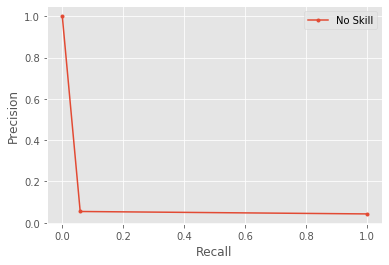

In [61]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot


# setting up a dummy model
model = DummyClassifier(strategy='stratified')  #Predict 0 or 1 proportional to the prior probability in the dataset 
model.fit(cat_nlp_train, y_train)
yhat = model.predict_proba(cat_nlp_test)
y_pred = model.predict(cat_nlp_test)
pos_probs = yhat[:, 1]



# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
F1_Score = f1_score(y_test, y_pred)
auc_score = auc(recall, precision)
pyplot.plot(recall, precision, marker='.', label='No Skill')
print('No Skill F1 Score: %.3f' % F1_Score)
print('No Skill PR AUC: %.3f' % auc_score)

generate_model_report(y_test, y_pred)

# # fit a model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# yhat = model.predict_proba(X_test)
# y_pred = model.predict(X_test)
# pos_probs = yhat[:, 1]

# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# F1_Score = f1_score(y_test, y_pred)
# auc_score = auc(recall, precision)
# pyplot.plot(recall, precision, marker='.', label='Random Forest')
# print(f'{model.__class__.__name__ } F1 Score:  %.3f' % F1_Score)
# print(f'{model.__class__.__name__ } PR AUC: %.3f' % auc_score)


# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## TFIDF vectorization

In [50]:
tfidf = TfidfVectorizer(max_features = 2000)

In [51]:
tfidf_matrix_train = tfidf.fit_transform(X_train.text.values.astype('U'))

In [52]:
tfidf_matrix_test =  tfidf.transform(X_test.text.values.astype('U'))

In [53]:
nlp_train = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf.get_feature_names())
nlp_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf.get_feature_names())

In [54]:
nlp_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
cat_nlp_train = pd.concat([nlp_train, X_train], axis=1)

nlp_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
cat_nlp_test = pd.concat([nlp_test, X_test], axis=1)

In [55]:
cat_nlp_train = cat_nlp_train.drop("text", axis=1)
cat_nlp_test = cat_nlp_test.drop("text", axis=1);

RandomForestClassifier F1 Score:  0.714
RandomForestClassifier PR AUC: 0.898
Accuracy: 0.981
Precision: 1.000
Recall: 0.556
F1 score: 0.714


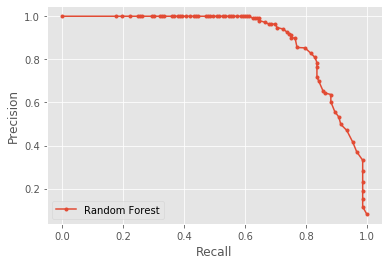

In [60]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

model = RandomForestClassifier()
model.fit(cat_nlp_train, y_train)
yhat = model.predict_proba(cat_nlp_test)
pos_probs = yhat[:, 1]
y_pred = model.predict(cat_nlp_test)


# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
F1_Score = f1_score(y_test, y_pred)
auc_score = auc(recall, precision)
pyplot.plot(recall, precision, marker='.', label='Random Forest')

print(f'{model.__class__.__name__ } F1 Score:  %.3f' % F1_Score)
print(f'{model.__class__.__name__ } PR AUC: %.3f' % auc_score)

generate_model_report(y_test, y_pred)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

GradientBoostingClassifier F1 Score:  0.672
GradientBoostingClassifier PR AUC: 0.681


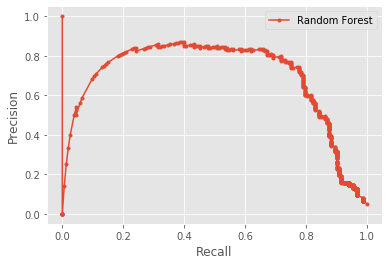

In [47]:
model = GradientBoostingClassifier()
model.fit(cat_nlp_train, y_train)
yhat = model.predict_proba(cat_nlp_test)
pos_probs = yhat[:, 1]
y_pred = model.predict(cat_nlp_test)


# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
F1_Score = f1_score(y_test, y_pred)
auc_score = auc(recall, precision)
pyplot.plot(recall, precision, marker='.', label='Random Forest')

print(f'{model.__class__.__name__ } F1 Score:  %.3f' % F1_Score)
print(f'{model.__class__.__name__ } PR AUC: %.3f' % auc_score)
generate_model_report(y_test, y_pred)



# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

LogisticRegression F1 Score:  0.678
LogisticRegression PR AUC: 0.784


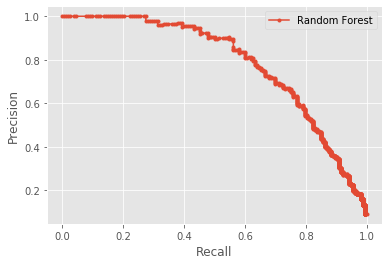

In [48]:
model = LogisticRegression(max_iter=500)
model.fit(cat_nlp_train, y_train)
yhat = model.predict_proba(cat_nlp_test)
pos_probs = yhat[:, 1]
y_pred = model.predict(cat_nlp_test)


# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
F1_Score = f1_score(y_test, y_pred)
auc_score = auc(recall, precision)
pyplot.plot(recall, precision, marker='.', label='Random Forest')

print(f'{model.__class__.__name__ } F1 Score:  %.3f' % F1_Score)
print(f'{model.__class__.__name__ } PR AUC: %.3f' % auc_score)
generate_model_report(y_test, y_pred)


# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()